In [1]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('ismeretlen.txt') as f:
    beut = f.readlines()

In [3]:
beut = list(map(lambda x:x.strip(),beut))

be = []
for i in range(len(beut)):
    be.append(float(beut[i]))

In [4]:
csat = []

for i in range(len(be)):
    csat.append(i + 1)

In [5]:
en = []

for i in range(len(csat)):
    en.append(0.0167331 + 0.0198541 * csat[i])

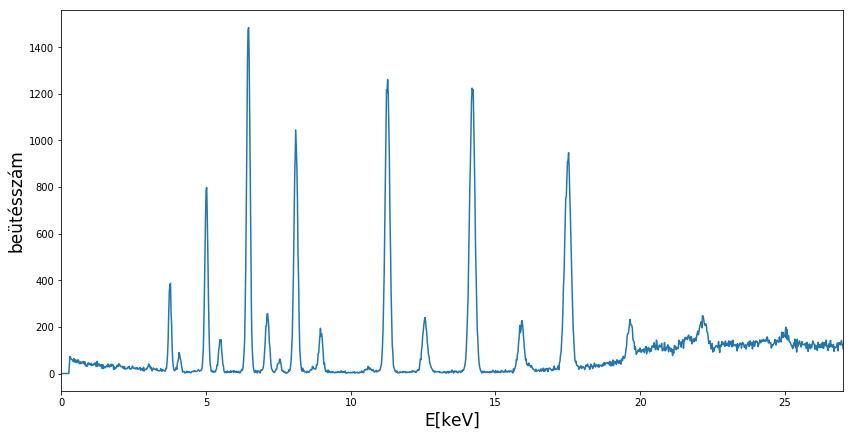

In [6]:
figsize(14, 7)
plot(en, be)
xlabel('E[keV]', fontsize = 17)
xlim(0, 27)
ylabel('beütésszám', fontsize = 17)
savefig('ismeretlen_spektrum.png')

In [7]:
def mos(x, a, b):
    return sqrt(a) * (x - b)

In [8]:
Z = [20, 23, 26, 28, 29, 34, 38, 42, 47]
K_alpha = [3.7, 4.6, 6.41, 7.47, 8.05, 11.22, 14.14, 17.45, 22.1]
K_beta = [4.05, 5.44, 7.07, 8.28, 8.91, 12.5, 15.87, 19.59, 24.94]

In [9]:
popt_a, pcov_a=curve_fit(mos, Z, sqrt(K_alpha))
perr_a = sqrt(diag(pcov_a))

/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [10]:
print('A = ', popt_a[0], 'pm', perr_a[0])
print('B = ', popt_a[1], 'pm', perr_a[1])

A =  0.010805220493469738 pm 0.00021657006762984223
B =  1.7896887735165978 pm 0.31344906598558014


In [11]:
#plot(Z, lin(Z, popt_a[0], -popt_a[1]/sqrt(popt_a[0])))

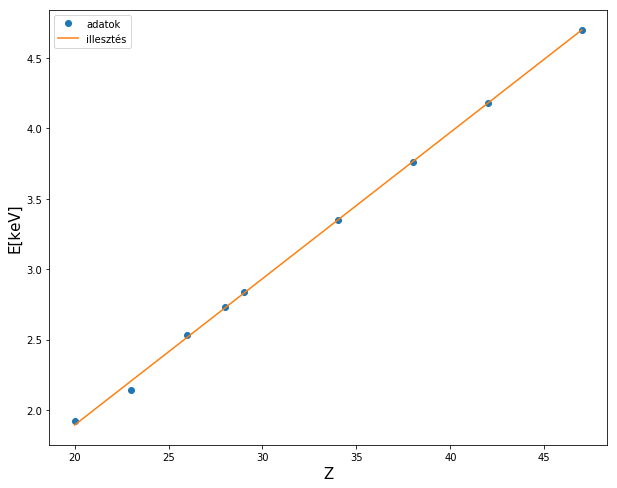

In [16]:
figsize(10, 8)
plot(Z, sqrt(K_alpha), marker = 'o', linestyle = '', label = 'adatok')
plot(Z, mos(Z, popt_a[0], popt_a[1]), label = 'illesztés')
xlabel('Z', fontsize = 15)
ylabel('E[keV]', fontsize = 15)
legend()
savefig('Moseley_K_alpha.png')

In [13]:
popt_b, pcov_b = curve_fit(mos, Z, sqrt(K_beta))
perr_b = sqrt(diag(pcov_b))

/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [14]:
print('A = ', popt_b[0], 'pm', perr_b[0])
print('B = ', popt_b[1], 'pm', perr_b[1])

A =  0.012201045788039475 pm 7.764173255472555e-05
B =  1.9071926607359293 pm 0.09915797503432157


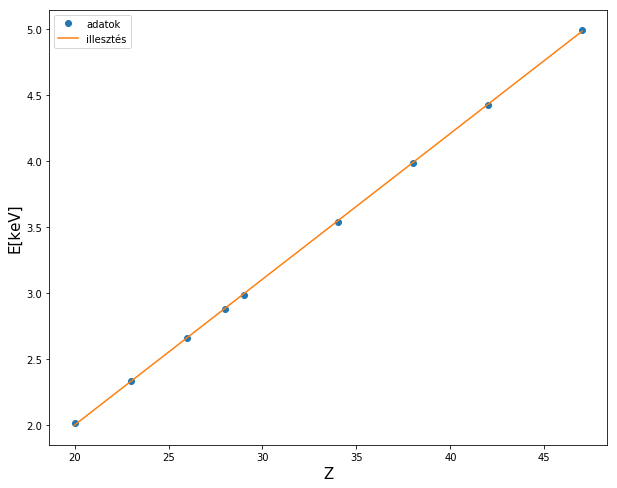

In [17]:
plot(Z, sqrt(K_beta), marker = 'o', linestyle = '', label = 'adatok')
plot(Z, mos(Z, popt_b[0], popt_b[1]), label = 'illesztés')
xlabel('Z', fontsize = 15)
ylabel('E[keV]', fontsize = 15)
legend()
savefig('Moseley_K_beta.png')